In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


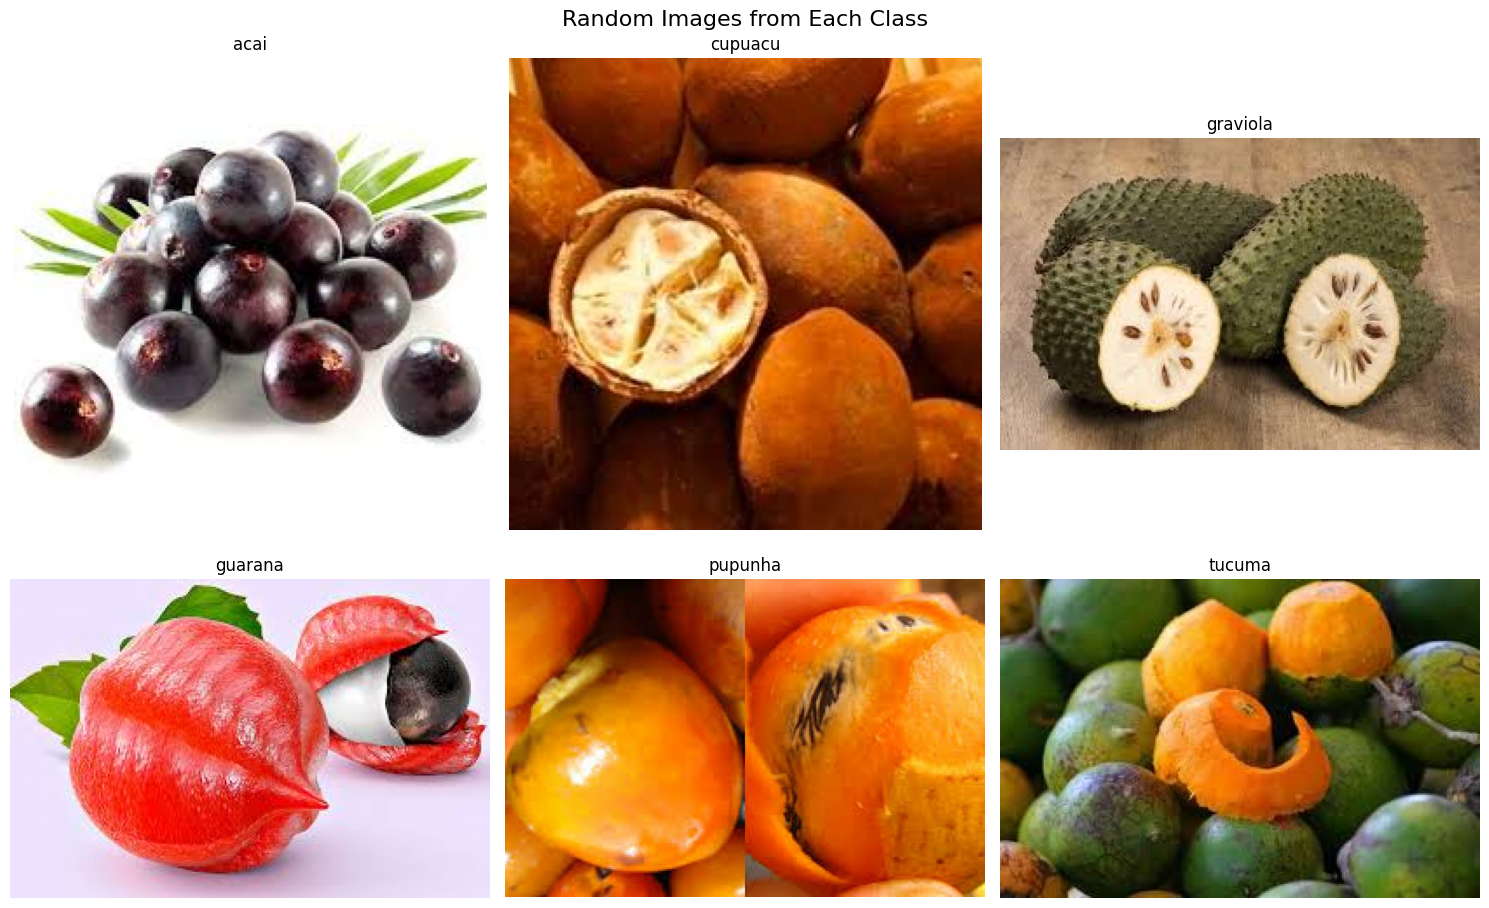

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the train directory path
train_dir = '/content/drive/MyDrive/FruitinAmazon/train'

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
class_dirs.sort()  # Sort for consistent order
print(f"Found {len(class_dirs)} classes: {class_dirs}")

# Select one random image from each class
images = []
class_names = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if image_files:  # Ensure there’s at least one image
        random_image = random.choice(image_files)
        image_path = os.path.join(class_path, random_image)
        images.append(image_path)
        class_names.append(class_dir)

# Check if we have images to display
if not images:
    raise ValueError("No images found in the dataset!")

# Display images in a 2-row grid
rows = 2
cols = (len(images) + 1) // 2  # Ceiling division to fit all classes
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figure size as needed
fig.suptitle("Random Images from Each Class", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each image
for i, (image_path, class_name) in enumerate(zip(images, class_names)):
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')  # Hide axes

# Hide any unused subplots (if odd number of classes)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

train_dir = '/content/drive/MyDrive/FruitinAmazon/train'
test_dir = '/content/drive/MyDrive/FruitinAmazon/test'
#load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224)
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224)
)

num_classes = len(train_dataset.class_names)

def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

train_dataset = train_dataset.map(normalize_img)
test_dataset = test_dataset.map(normalize_img)

#CNN model define
model = keras.Sequential([
    keras.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()
 #compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

histroy = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[checkpoint, early_stopping]
)

#Evaluate model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

#make predictions on one batch
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    actual_labels = np.argmax(labels, axis=1)
    print("Predicted Labels:", predicted_labels)
    print("Actual Labels:", actual_labels)
    break


Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,916,038 (91.23 MB)

 Trainable params: 23,916,038 (91.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2266 - loss: 4.4115
Epoch 1: val_loss improved from inf to 11.66214, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 10s/step - accuracy: 0.2227 - loss: 5.0011 - val_accuracy: 0.1667 - val_loss: 11.6621
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1597 - loss: 9.1303
Epoch 2: val_loss improved from 11.66214 to 3.72275, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.1615 - loss: 8.8567 - val_accuracy: 0.1667 - val_loss: 3.7228
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1782 - loss: 3.1757
Epoch 3: val_loss improved from 3.72275 to 1.63310, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.1892 - loss: 3.0381 - val_accuracy: 0.3000 - val_loss: 1.6331
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3277 - loss: 1.5383
Epoch 4: val_loss improved from 1.63310 to 1.50019, saving model to best_model.ker

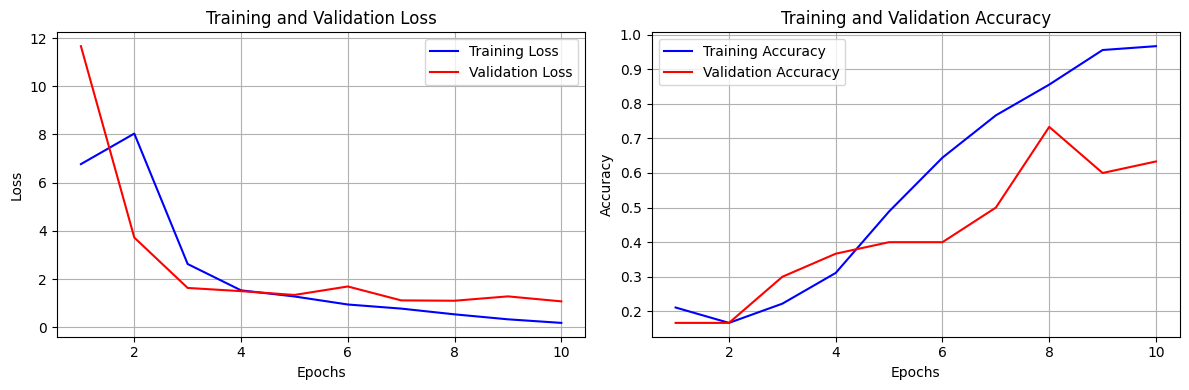

In [ ]:
history_dict = histroy.history
epochs = range(1, len(history_dict['loss']) + 1)
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(12, 4))

#plot 1
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

#plot 2
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model.save('fruitdetection.h5')
loaded_model = keras.models.load_model('fruitdetection.h5')

print('model saved to fruitdetection.h5')
print('model loaded from fruitdetection.h5')

model saved to fruitdetection.h5
model loaded from fruitdetection.h5


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report
loaded_model = keras.models.load_model('fruitdetection.h5')
print("Model loaded for predictions")

# Collect all test images and labels
all_images = []
all_labels = []
for images, labels in test_dataset:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())

# Concatenate batches into single arrays
test_images = np.concatenate(all_images, axis=0)  # Shape: (30, 128, 128, 3)
test_labels_onehot = np.concatenate(all_labels, axis=0)  # Shape: (30, 6)

# Make predictions
predictions = loaded_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_labels = np.argmax(test_labels_onehot, axis=1)  # Convert one-hot to class indices

# Get class names from the dataset
class_names = test_dataset

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", report)

Model loaded for predictions
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.20      0.33         5
           2       0.42      1.00      0.59         5
           3       1.00      0.80      0.89         5
           4       0.62      1.00      0.77         5
           5       0.00      0.00      0.00         5

    accuracy                           0.63        30
   macro avg       0.64      0.63      0.56        30
weighted avg       0.64      0.63      0.56        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
